## About the data

* Original source of the data: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
* Ten baseline variables for n = 442 diabetes patients
* Response of interest, "Y", a quantitative measure of disease progression one year after baseline
* Explanatory variables
    * `age`: age in years
    * `sex`: sex
    * `bmi`: body mass index
    * `bp`: average blood pressure
    * `s1`: tc, T-Cells (a type of white blood cells)
    * `s2`: ldl, low-density lipoproteins
    * `s3`: hdl, high-density lipoproteins
    * `s4`: tch, thyroid stimulating hormone
    * `s5`: ltg, lamotrigine
    * `s6`: glu, blood sugar level
* Target variable
    * `y`: a quantitative measure of disease progression one year after baseline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

### 1.1 import the data as pandas dataframe and display the top 10 rows of the data

In [5]:
data = pd.read_csv('diabetes.tsv',sep='\t')

data.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


### 1.2 check the distribution of the numeric features

In [4]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 1.3 check the number of data points by sex

In [4]:
rowcount_1 = len(data[(data['SEX']==1)])
rowcount_2 = len(data[(data['SEX']==2)])

nums = [['1',rowcount_1], ['2',rowcount_2]]
dist_by_sex = pd.DataFrame(nums, columns=['SEX','rowcount'])
dist_by_sex

,SEX,rowcount
0,1,235
1,2,207


### 1.4 generate a pairplot to visualize the distribution and pairwise correlations across the numeric features

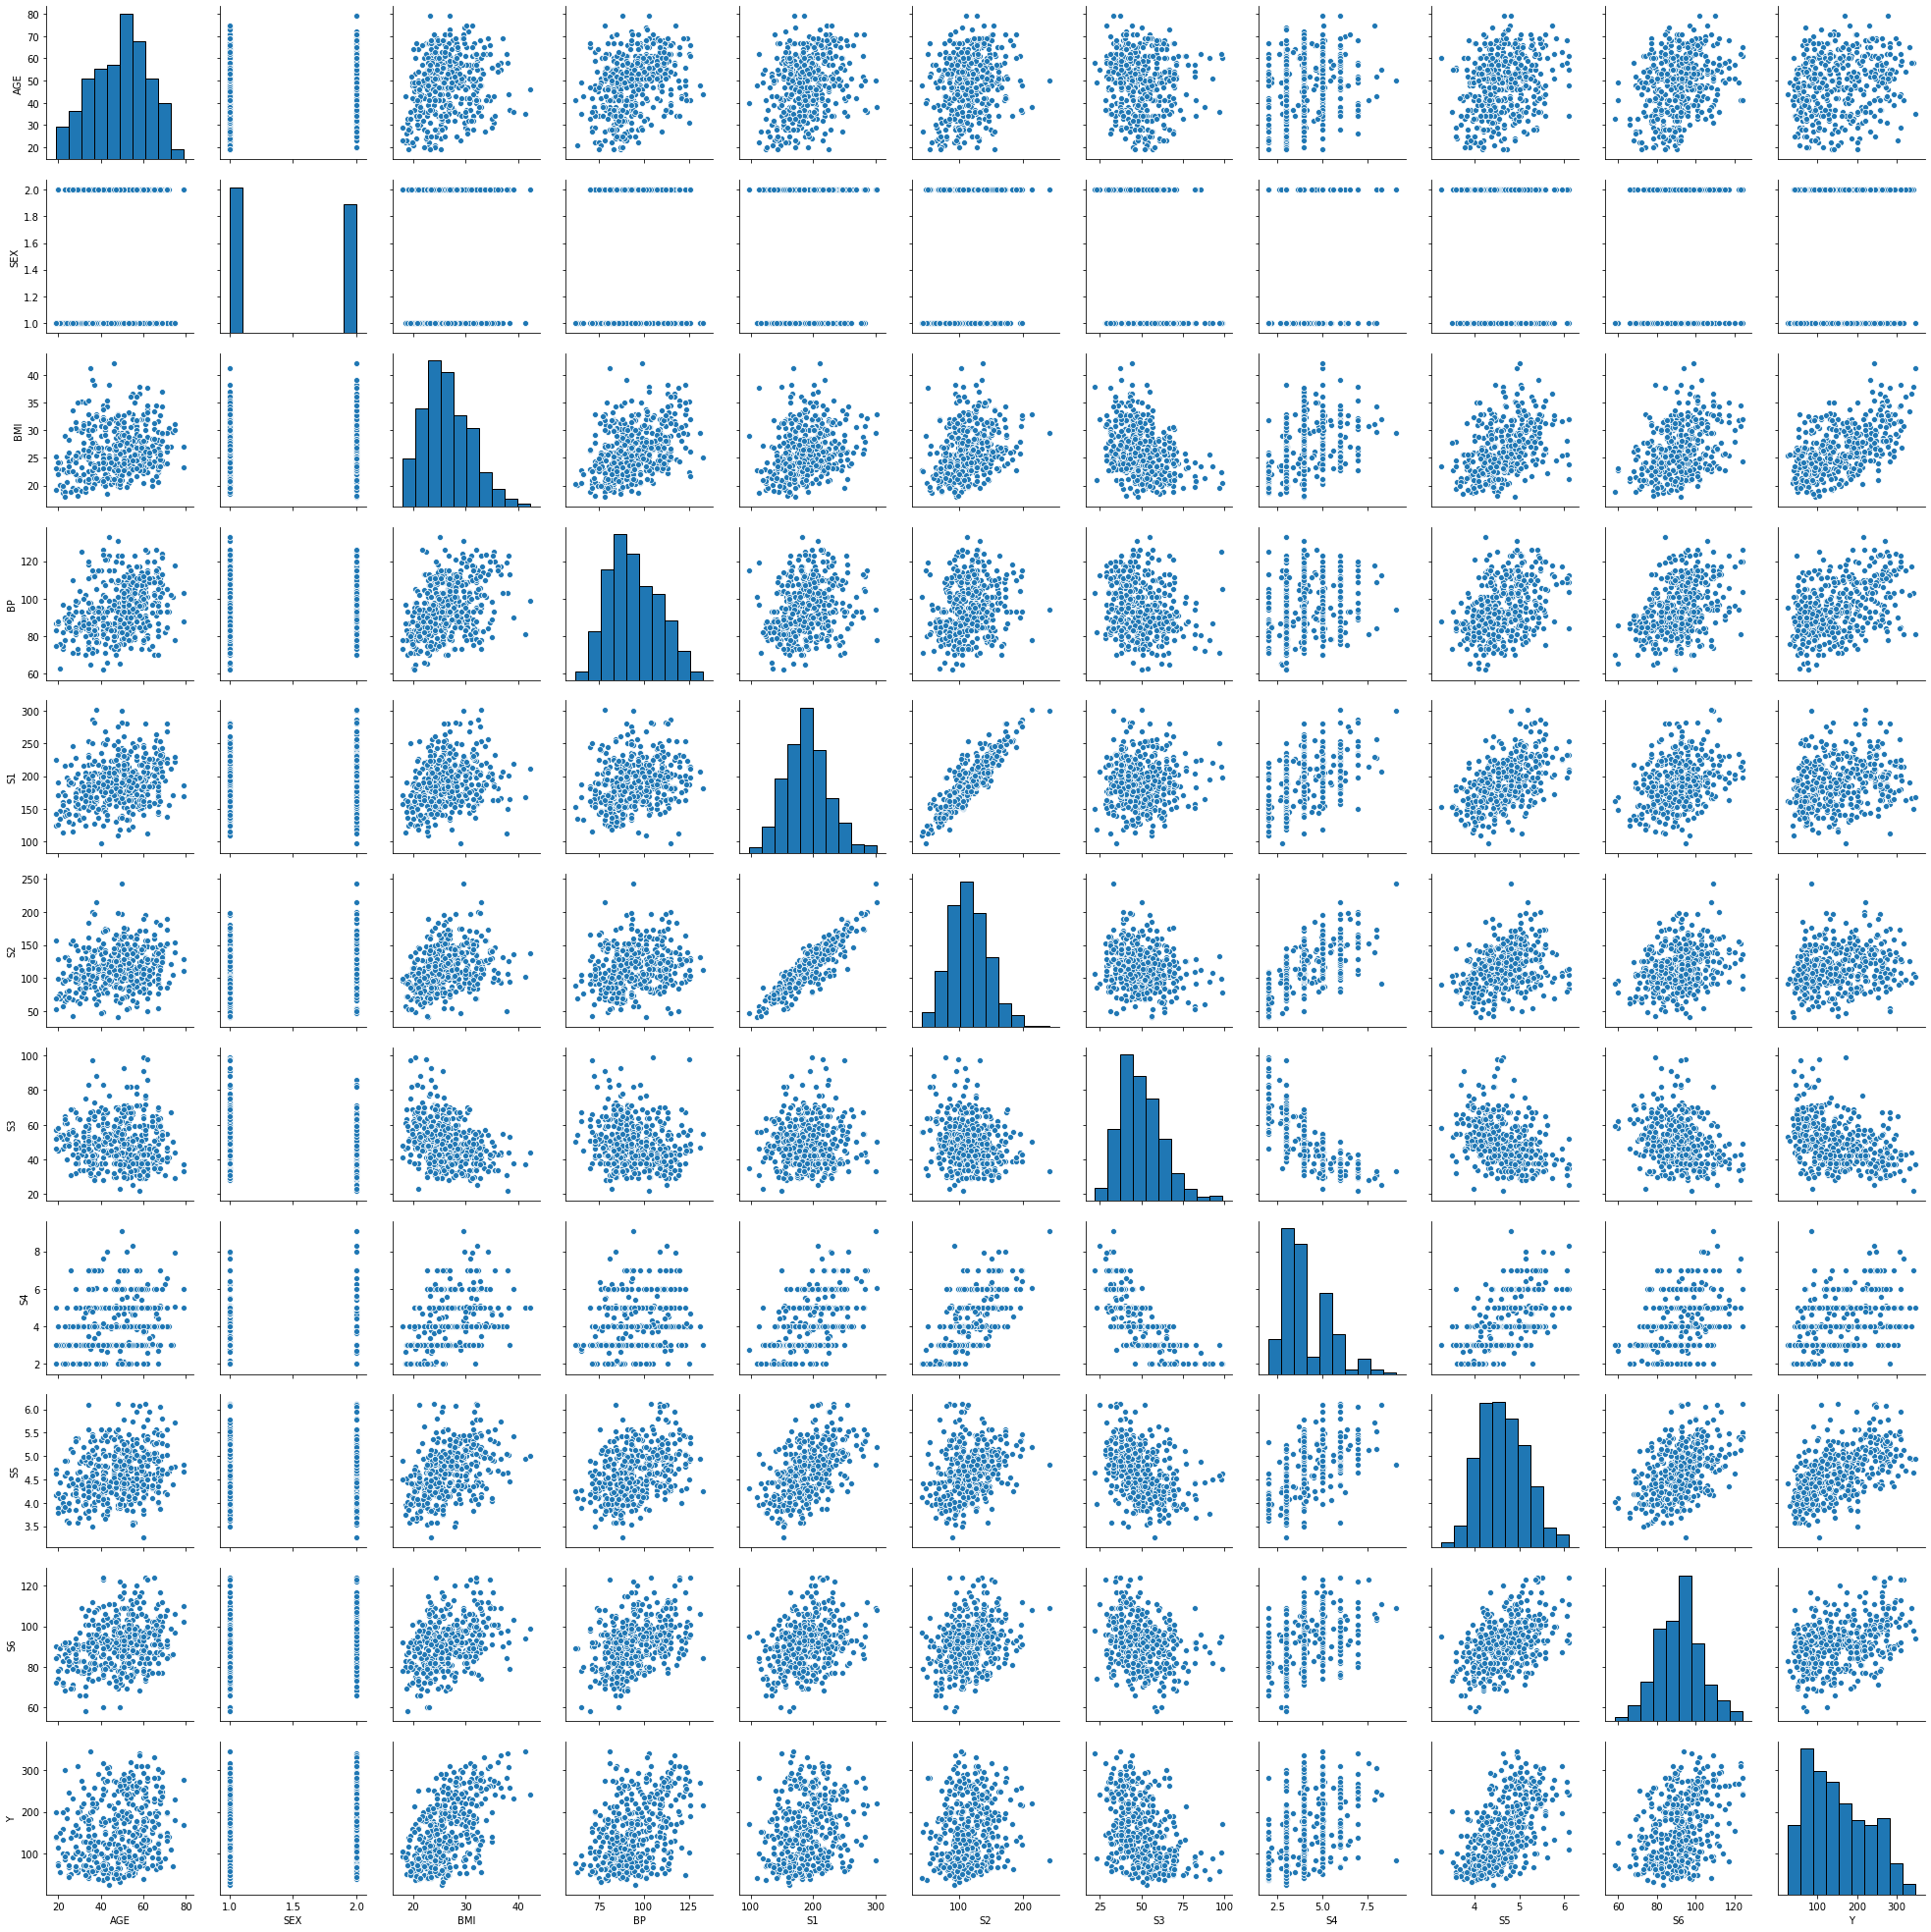

In [5]:
pairs = sns.pairplot(data, diag_kws=dict(edgecolor='black'))
pairs

## Q2. Analyze the correlations

### 2.1 get the pairwise correlation values across all numeric features in the data

In [6]:
corrs = data.corr(method='pearson')
corrs

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### 2.2 visualize the correlation in a heatmap

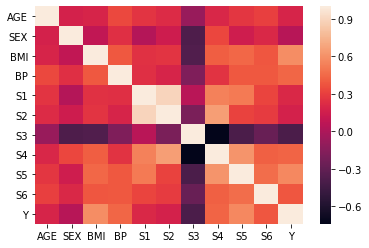

In [7]:
sns.heatmap(data.corr())

### 2.3 sort the correlations between Y and all other variables

In [66]:
corrs_sorted = corrs['Y'].sort_values(ascending=False).reset_index()
corrs_sorted

,index,Y
0,Y,1.000000
1,BMI,0.586450
2,S5,0.565883
3,BP,0.441482
4,S4,0.430453
5,S6,0.382483
6,S1,0.212022
7,AGE,0.187889
8,S2,0.174054
9,SEX,0.043062


## Q3. Train-Test split

### 3.1 split the data into `train_set` and `test_set`. `test_set` should cover 20% of the original data records

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=123)

### 3.2 split the data into training and test sets via stratified sampling on variable SEX

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit    
    
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, random_state=123, stratify=data['SEX'])

### 3.3 check if the stratified sampling helps on making the SEX distribution balanced between train and test sets

In [31]:
compare_props = pd.DataFrame({
    "Overall": data.SEX.value_counts()/data.shape[0],
    "Stratified": strat_test_set["SEX"].value_counts()/len(strat_test_set),
    "Random": test_set["SEX"].value_counts()/len(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"]/compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"]/compare_props["Overall"] - 100
sex = [1,2]
compare_props["SEX"] = sex
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error,SEX
1,0.531674,0.52809,0.550562,3.552474,-0.674157,1
2,0.468326,0.47191,0.449438,-4.033002,0.765348,2


### 3.4 create X_train, X_test, y_train, and y_test to hold the explanatory variables and target variables in train and test set

In [77]:
from sklearn.model_selection import train_test_split

X_train = train_set.drop(columns='Y')
y_train = train_set.filter(['Y'])
X_test = test_set.drop(columns='Y')
y_test = test_set.filter(['Y'])

### 3.5 print out the shape of X_train, y_train, X_test, y_test

In [78]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (353, 10)
Shape of y_train: (353, 1)
Shape of X_test: (89, 10)
Shape of y_test: (89, 1)


## Q4. Model Fit and Evaluation

### 4.1 Fit a Linear Regression model on the training set

In [84]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

Xsample = np.c_[X_train]
ysample = np.c_[y_train]

lr.fit(Xsample, ysample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.2 Get the intercept and coefficients, coefficients in dataframe with corresponding variable name

In [153]:
intercept = lr.intercept_[0]
coefs = lr.coef_[0]

print('The intercept value is {}'.format(intercept))

The intercept value is -321.08646915882593


In [158]:
x = data[data.columns[:-1]]
a = coefs.tolist()

coeffs = pd.DataFrame({
    'attribute': x.columns,
    'coefficient': a
    
}).sort_values('coefficient', ascending=False).reset_index(drop=True)
coeffs

,attribute,coefficient
0,S5,62.996341
1,S4,9.334309
2,BMI,5.445123
3,BP,1.017744
4,S2,0.731061
5,S3,0.481358
6,S6,0.460633
7,AGE,-0.022467
8,S1,-1.136607
9,SEX,-21.469547


### Get the RMSE and $R^2$ values in training set

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_pred = lr.predict(Xsample)
lin_reg_mse = mean_squared_error(ysample, y_train_pred)
rmse_train = np.sqrt(lin_reg_mse)

r2_train = r2_score(ysample, data_predictions)

print('RMSE: {}'.format(rmse_train))
print('R2: {}'.format(r2_train))

RMSE: 53.9350844776609
R2: 0.5015516188475684


### Get the RMSE and $R^2$ values in test set

In [135]:
Xsample1 = np.c_[X_test]
ysample1 = np.c_[y_test]


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_test_pred = lr.predict(Xsample1)
lin_reg_mse1 = mean_squared_error(ysample1, y_test_pred)
rmse_test = np.sqrt(lin_reg_mse1)

r2_test = r2_score(ysample1, y_test_pred)

print('RMSE: {}'.format(rmse_test))
print('R2: {}'.format(r2_test))

RMSE: 52.19442575216967
R2: 0.567589572579321
